# Tutorial 6: Generating Transition Probability Matrices ``transition_matrix``

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/donishadsmith/neurocaps/blob/stable/docs/examples/tutorial-6.ipynb)

The ``CAP.calculate_metrics()`` function is designed to compute transition probabilities for all subjects and store these
values into dataframes (one per group). These dataframes can subsequently be used as input for the ``transition_matrix()``
function to generate visualizations of the average transition probabilities per group.

In [1]:
# Download packages
try:
    import neurocaps
except:
    !pip install neurocaps[windows,demo]

In [2]:
import numpy as np
from neurocaps.analysis import CAP, transition_matrix

np.random.seed(0)

# Simulate `subject_timeseries` structure
subject_timeseries = {
    str(x): {f"run-{y}": np.random.rand(10, 100) for y in range(1, 4)} for x in range(1, 10)
}

cap_analysis = CAP()

cap_analysis.get_caps(
    subject_timeseries=subject_timeseries,
    cluster_selection_method="davies_bouldin",
    standardize=True,
    n_clusters=list(range(2, 6)),
)

2025-07-21 14:31:30,830 neurocaps.analysis.cap._internals.cluster [INFO] No groups specified. Using default group 'All Subjects' containing all subject IDs from `subject_timeseries`. The `groups` dictionary will remain fixed unless the `CAP` class is re-initialized or `clear_groups()` is used.
2025-07-21 14:31:30,930 neurocaps.analysis.cap._internals.cluster [INFO] [GROUP: All Subjects | METHOD: davies_bouldin] Optimal cluster size is 5.


In [3]:
outputs = cap_analysis.calculate_metrics(
    subject_timeseries=subject_timeseries,
    return_df=True,
    metrics=["transition_probability"],
    continuous_runs=True,
)

outputs["transition_probability"]["All Subjects"]

,Subject_ID,Group,Run,1.1,1.2,1.3,1.4,1.5,2.1,2.2,...,4.1,4.2,4.3,4.4,4.5,5.1,5.2,5.3,5.4,5.5
0,1,All Subjects,run-continuous,0.250000,0.250000,0.250000,0.250000,0.000000,0.0,0.00,...,0.125000,0.125000,0.000000,0.375000,0.375000,0.125000,0.000000,0.500000,0.375000,0.000000
1,2,All Subjects,run-continuous,0.000000,0.000000,0.333333,0.000000,0.666667,0.0,0.00,...,0.000000,0.000000,0.142857,0.285714,0.571429,0.153846,0.000000,0.153846,0.230769,0.461538
2,3,All Subjects,run-continuous,0.200000,0.000000,0.200000,0.400000,0.200000,0.0,0.20,...,0.250000,0.000000,0.000000,0.000000,0.750000,0.250000,0.125000,0.125000,0.250000,0.250000
3,4,All Subjects,run-continuous,0.250000,0.250000,0.000000,0.250000,0.250000,0.5,0.00,...,0.000000,0.000000,0.600000,0.000000,0.400000,0.181818,0.090909,0.272727,0.090909,0.363636
4,5,All Subjects,run-continuous,0.000000,0.166667,0.333333,0.166667,0.333333,0.0,0.00,...,0.142857,0.142857,0.000000,0.285714,0.428571,0.571429,0.000000,0.142857,0.000000,0.285714
5,6,All Subjects,run-continuous,0.000000,0.250000,0.000000,0.250000,0.500000,0.0,0.25,...,0.250000,0.125000,0.125000,0.125000,0.375000,0.285714,0.000000,0.285714,0.285714,0.142857
6,7,All Subjects,run-continuous,0.142857,0.428571,0.000000,0.428571,0.000000,0.6,0.00,...,0.000000,0.000000,0.333333,0.000000,0.666667,0.333333,0.166667,0.166667,0.166667,0.166667
7,8,All Subjects,run-continuous,0.000000,0.000000,0.666667,0.333333,0.000000,0.0,0.00,...,0.428571,0.000000,0.142857,0.285714,0.142857,0.000000,0.166667,0.333333,0.000000,0.500000
8,9,All Subjects,run-continuous,0.000000,0.000000,0.000000,0.250000,0.750000,0.0,0.00,...,0.125000,0.000000,0.500000,0.125000,0.250000,0.090909,0.090909,0.181818,0.272727,0.363636


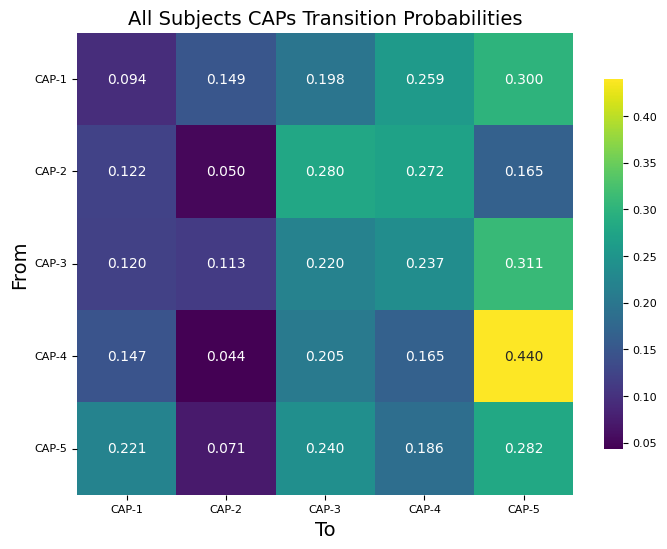

In [4]:
from neurocaps.utils import PlotDefaults

plot_kwargs = PlotDefaults.transition_matrix()
plot_kwargs.update({"cmap": "viridis", "fmt": ".3f", "annot": True})

trans_outputs = transition_matrix(
    trans_dict=outputs["transition_probability"], show_figs=True, return_df=True, **plot_kwargs
)

In [5]:
trans_outputs["All Subjects"]

,CAP-1,CAP-2,CAP-3,CAP-4,CAP-5
From/To,,,,,
CAP-1,0.093651,0.149471,0.198148,0.258730,0.300000
CAP-2,0.122222,0.050000,0.279630,0.272222,0.164815
CAP-3,0.119577,0.113228,0.220106,0.236508,0.310582
CAP-4,0.146825,0.043651,0.204894,0.164683,0.439947
CAP-5,0.221339,0.071128,0.240218,0.185754,0.281561
